<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/Lab06_Resnet%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_X_ray_%ED%9D%89%EB%B6%80_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt  
import numpy as np
import torchvision
import torchvision.transforms as transforms

## input : 3 * 224 * 224, output : 1000 * 1

In [ ]:
batch_size = 800
path_train = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/실습자료07_rsna2018/train/'
path_valid = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/실습자료07_rsna2018/valid/'
train_transforms = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels = 1),
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ]
)

trainset = torchvision.datasets.ImageFolder(root = path_train, transform = train_transforms)
validset = torchvision.datasets.ImageFolder(root = path_valid, transform = train_transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
validloader = torch.utils.data.DataLoader(validset, batch_size = batch_size, shuffle = False)

# modeling
import torchvision.models as models
from torchvision.models import resnet50, ResNet50_Weights
model = resnet50(weights = None)


In [ ]:
tgtnames = trainset.classes

torch.Size([32, 1, 64, 64])
torch.Size([32])


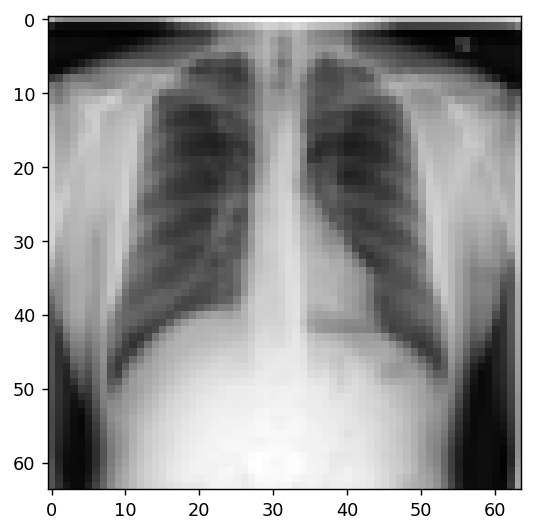

In [ ]:
for X, y in trainloader:
  print(X.shape)
  print(y.shape)
  I = X[0][0].numpy()
  plt.figure(dpi = 128)
  plt.imshow(I, cmap = 'gray')
  plt.show()
  break

In [ ]:
print(model.conv1)
model.conv1 = torch.nn.Conv2d(1, 64, 7, 2, 3, bias = False)
print(model.conv1)
print(model.fc)
model.fc = torch.nn.Linear(2048, 3,)
print(model.fc)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Linear(in_features=2048, out_features=1000, bias=True)
Linear(in_features=2048, out_features=3, bias=True)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cpu


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
learning_rate = 0.01
num_epochs = 5
# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(model.parameters(),lr=learning_rate) # sgd

In [ ]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
    i=0
    l_epoch = 0
    correct = 0
    model.train()
    for X,y in trainloader:
        i=i+1
        X,y = X.to(device),y.to(device)
        y_hat=model(X)
        correct += (y_hat.argmax(dim=1)==y).sum()
        l=loss(y_hat,y)
        l_epoch+=l
        alg.zero_grad()
        l.backward()
        alg.step()

    loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
    accs_train = np.append(accs_train,correct.cpu()/len(trainset))

    correct = 0
    model.eval()
    for X,y in validloader:
        X,y = X.to(device),y.to(device)
        y_hat = model(X)
        correct += (y_hat.argmax(dim=1)==y).sum()

    accs_valid = np.append(accs_valid,correct.cpu()/len(validset))

    plt.figure(2,dpi=80)
    plt.subplot(121)
    plt.plot(loss_train,label='train loss')
    plt.legend(loc='upper right')
    plt.subplot(122)
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='upper left')
    plt.title('epoch: %d '%(epoch))
    plt.savefig('loss_curve.png')
#    plt.show()
    plt.close(2)

    if epoch%5 == 0:
        print('epoch: %d '%(epoch))
        print('train loss: ',loss_train[-1])
        print('train accuracy: ',accs_train[-1])
        print('valid accuracy: ',accs_valid[-1])


epoch: 0 
train loss:  1.1663460540771484
train accuracy:  0.7200000286102295
valid accuracy:  0.6200000047683716


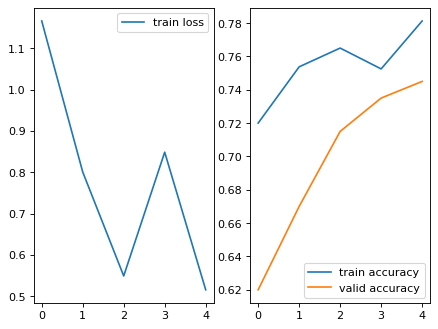

In [ ]:
plt.figure(2,dpi=80)
plt.subplot(121)
plt.plot(loss_train,label='train loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(accs_train,label='train accuracy')
plt.plot(accs_valid,label='valid accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from PIL import Image

normal


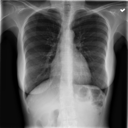

In [ ]:
N = 42

I = Image.open(validset.imgs[N][0])
X = train_transforms(I)
y = validset.targets[N]

print(tgtnames[y])
I


In [ ]:
y_hat = model(X.unsqueeze(1).to(device))
print(y_hat.cpu().detach().numpy())
y_hat = y_hat.argmax(dim=1)
print(f'prediction of mycnn: {tgtnames[y_hat.cpu().numpy()[0]]}')

[[  6.6124587   5.7439914 -12.346163 ]]
prediction of mycnn: normal


In [ ]:
y_list = np.array([])
y_hat_list = np.array([])
for X,y in validloader:
  y_hat = model(X.to(device))    
  y_hat = y_hat.argmax(dim=1)
  y_list = np.append(y_list,y)
  y_hat_list = np.append(y_hat_list,y_hat.cpu().numpy())

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)

In [ ]:
print(classification_report(
    y_list,
    y_hat_list,
    target_names=tgtnames))

              precision    recall  f1-score   support

      normal       0.70      0.87      0.77       100
     opacity       0.83      0.62      0.71       100

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200



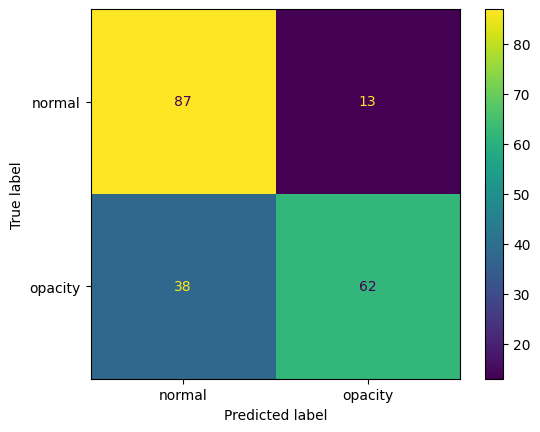

In [ ]:

cm = confusion_matrix(
    y_list,
    y_hat_list,
#    normalize='true',
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=tgtnames,
)
disp.plot(ax=plt.subplots(1, 1, facecolor='white')[1])
     

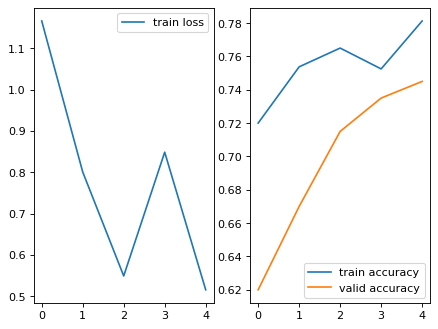

In [ ]:

plt.figure(2,dpi=80)
plt.subplot(121)
plt.plot(loss_train,label='train loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(accs_train,label='train accuracy')
plt.plot(accs_valid,label='valid accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from PIL import Image

N = 42
I = Image.open(validset.imgs[N][0])